In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

In [ ]:
import sys
sys.path.append('../code/')

In [ ]:
!pwd

In [ ]:
from logistic_regression import LogisticRegression
from logistic_regression_batch import LogisticRegressionBatch
from hyperparameter_explorer import HyperparameterExplorer

In [ ]:
from mnist_helpers import mnist_training, mnist_testing

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

In [ ]:
train_X, train_y = mnist_training(shuffled=True)
test_X, test_y = mnist_testing(shuffled=True)

In [ ]:
train_X, train_y = train_X[0:3000,], train_y[0:3000, ]

In [ ]:
hyper_explorer_sgd = HyperparameterExplorer(X=train_X, y=train_y, 
                                        model=LogisticRegression, 
                                        validation_split=0.1, 
                                        score_name = '-(log loss)/N, training', 
                                        use_prev_best_weights=True,
                                        test_X=test_X, test_y=test_y)  

In [ ]:
eta0 = 0.1
max_iter = 5
batch_size = 1
delta_percent = 0.1

In [ ]:
hyper_explorer_sgd.train_model(lam=1, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=True)

In [13]:
hyper_explorer_sgd.models[1]

In [14]:
model = hyper_explorer_sgd.models[1]

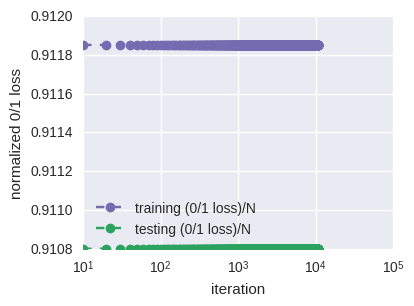

In [15]:
model.plot_test_and_train_01_loss_during_fitting()

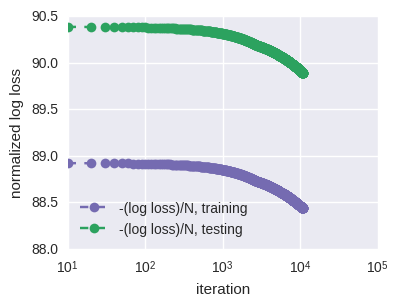

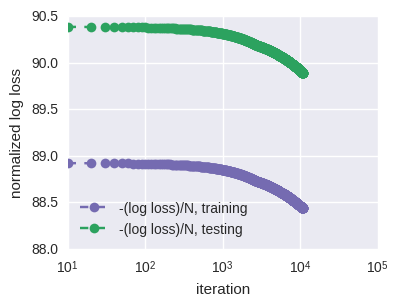

In [17]:
model.plot_test_and_train_log_loss_during_fitting()

In [18]:
hyper_explorer_sgd.train_on_whole_training_set()

getting best model.
{'training 0/1 loss': [2462], '# nonzero weights': [170], '-(log loss)/N, training': [88.433255838666781], 'log loss': [-238769.79076440033], 'eta0': [0.1], 'weights': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])], 'iteration': [10800], 'lambda normalized': [0.02179468752317407], 'training (0/1 loss)/N': [0.9118518518518518], 'batch size': [1], 'lambda': [1], '# of passes through N pts': [4], '-(log loss), training': [238769.79076440033], 'eta': [0.040824829046386304]}
.88.4269702108
Loss optimized.  Old/N: 88.5056844052152, new/N:88.42697021080401. Eta: 0.05773502691896258
final normalized training -(log loss): 88.42697021080401


In [21]:
hyper_explorer_sgd.final_model.N

3000

In [20]:
hyper_explorer_sgd.final_model.results_row()

{'# nonzero weights': [170],
 '# of passes through N pts': [5],
 '-(log loss), training': [265280.91063241207],
 '-(log loss)/N, training': [88.426970210804015],
 'batch size': [1],
 'eta': [0.05773502691896258],
 'eta0': [0.1],
 'iteration': [13800],
 'lambda': [1],
 'lambda normalized': [0.02179468752317407],
 'log loss': [-265280.91063241207],
 'training (0/1 loss)/N': [0.91166666666666663],
 'training 0/1 loss': [2735],
 'weights': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]}

In [19]:
hyper_explorer_sgd.evaluate_test_data()

                                                                           0
# nonzero weights                                                        170
# of passes through N pts                                                  5
-(log loss), test                                                     898104
-(log loss)/N, test                                                  89.8104
batch size                                                                 1
eta                                                                 0.057735
eta0                                                                     0.1
iteration                                                              13800
lambda                                                                     1
lambda normalized                                                  0.0217947
log loss                                                             -898104
test (0/1 loss)/N                                                     0.9108

In [ ]:
hyper_explorer_sgd.train_model(lam=0, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=False)

In [ ]:
hyper_explorer_sgd.train_model(lam=2, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=False)

In [ ]:
hyper_explorer_sgd.train_model(lam=3, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=False)

In [ ]:
hyper_explorer_sgd.train_model(lam=5, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=False)

In [ ]:
hyper_explorer_sgd.train_model(lam=10, eta0=eta0, max_iter=max_iter,  
                               batch_size=batch_size, progress_monitoring_freq=batch_size*10,
                               delta_percent=delta_percent, verbose=False)

In [ ]:
 hyper_explorer_sgd.plot_best_fits(logx=False)

In [ ]:
hyper_explorer_sgd.summary.tail(3)

In [ ]:
assert False

In [ ]:
hyper_explorer_sgd.best('model').results.tail(3)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_data = hyper_explorer_sgd.best('model').results
print(plot_data.columns)
xval = '# of passes through N pts'
colors=['b', 'g']
plt.plot(plot_data[xval], plot_data['-(log loss)/N, training'], linestyle='--', marker='o', color=colors[0])
plt.plot(plot_data[xval], plot_data['-(log loss)/N, testing'], linestyle='--', marker='o', color=colors[1])
plt.legend(loc='best')
plt.xlabel(xval)
plt.ylabel('-(log loss)/N')
ax.axhline(y=0, color='k')
plt.tight_layout()
#fig.savefig("161031_Q-2-1_norm_log_loss_during_fit--no_starting_weights.pdf")

In [ ]:
hyper_explorer_sgd.train_on_whole_training_set(max_iter=10**3)

In [ ]:
hyper_explorer_sgd.evaluate_test_data()